<a href="https://colab.research.google.com/github/luisedu96/TransmisionGuiada/blob/master/Actividades/Actividad1RuidoTermico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

Mega=np.power(10,6)
Micro=np.power(0.1,6)

R=1

def ruido_termico(b,uV):
  Na = 1001
  k=1.38*np.power(0.1,23)
  T=298
  B=b*Mega
  vrmsnoise=np.sqrt(4*k*T*R*B)*np.power(10,6)#micro-voltios
  noise = np.random.normal(0, vrmsnoise, Na)
  noise_std = np.std(noise)#Vrms
  noise_u = np.mean(noise)#DC

  f=1*Mega
  T=1/f
  t = np.arange(0,2*T,T/500)
  vo = uV*np.sqrt(2)
  vt = vo*np.cos(2*np.pi*f*t)
  señal_ruido=vt+noise

  señal_ruido_std=np.std(señal_ruido)
  señal_ruido_u=np.mean(señal_ruido)
  
  print('Constante de Boltzman ')
  display(Math(r'k=1.38x10^{-23}\frac{J}{K}'))
  print('Temperatura ')
  display(Math(r'T= 298K'))
  print('Resistencia ')
  display(Math(r'R = 1\Omega'))
  print('Ancho de Banda del Ruido')
  display(Math(r'B = '+str(Ancho_de_Banda_Ruido_en_MHz)+r'Mhz'))
  print('Voltaje generado por el Ruido Térmico')
  display(Math(r'V_{rms} = \sqrt{4kTRB} = '+str(vrmsnoise)+r'\mu V'))
  print('Voltaje de la señal')
  display(Math(r'V_{rms} = '+str(Voltaje_señal_en_uV)+r'\mu V'))
  print('Frecuencia de la señal')
  display(Math(r'f= 1Mhz'))

  print("Señal más Ruido Vrms= "+str(señal_ruido_std)+" V \n")
  
  fig,ax = plt.subplots(1,2, figsize=(23,10))
  ax[0].plot(t, noise,'b', lw=2, label='Ruido')
  ax[0].axis([0,2*T,-13,13])
  ax[0].plot([0,2*T], [noise_std, noise_std], 'r--', lw=2, label='$V_{RMS}$')
  ax[0].plot([0,2*T], [noise_u, noise_u], 'k--', lw=2, label='DC')
  ax[0].legend(loc='lower left')
  ax[0].set_xlabel('$Tiempo [μs]$', fontsize=14)
  ax[0].set_ylabel('$Voltaje [μV]$', fontsize=14)
  ax[0].set_title('Ruido Térmico, u={:.3f}; $\sigma$={:.3f}'.format(noise_u,noise_std),fontsize=15)

  ax[1].plot(t, señal_ruido, 'b', lw=2, label='Voltaje')
  ax[1].axis([0,2*T,-25,25])
  ax[1].plot([0,2*T], [señal_ruido_std, señal_ruido_std], 'r--', lw=2, label='$V_{RMS}$')
  ax[1].plot([0,2*T], [np.mean(señal_ruido),np.mean(señal_ruido)], 'k--', lw=2, label='DC')
  ax[1].legend(loc='lower left')
  ax[1].set_xlabel('$Tiempo [μs]$', fontsize=14)
  ax[1].set_ylabel('$Voltaje [μV]$', fontsize=14)
  ax[1].set_title('Señal más el Ruido Térmico, u={:.3f}; $\sigma$={:.3f}'.format(señal_ruido_u,señal_ruido_std),fontsize=15)
  fig.show()

#**Ruido Térmico y Señal**

Constante de Boltzman 


<IPython.core.display.Math object>

Temperatura 


<IPython.core.display.Math object>

Resistencia 


<IPython.core.display.Math object>

Ancho de Banda del Ruido


<IPython.core.display.Math object>

Voltaje generado por el Ruido Térmico


<IPython.core.display.Math object>

Voltaje de la señal


<IPython.core.display.Math object>

Frecuencia de la señal


<IPython.core.display.Math object>

Señal más Ruido Vrms= 10.71660873922769 V 



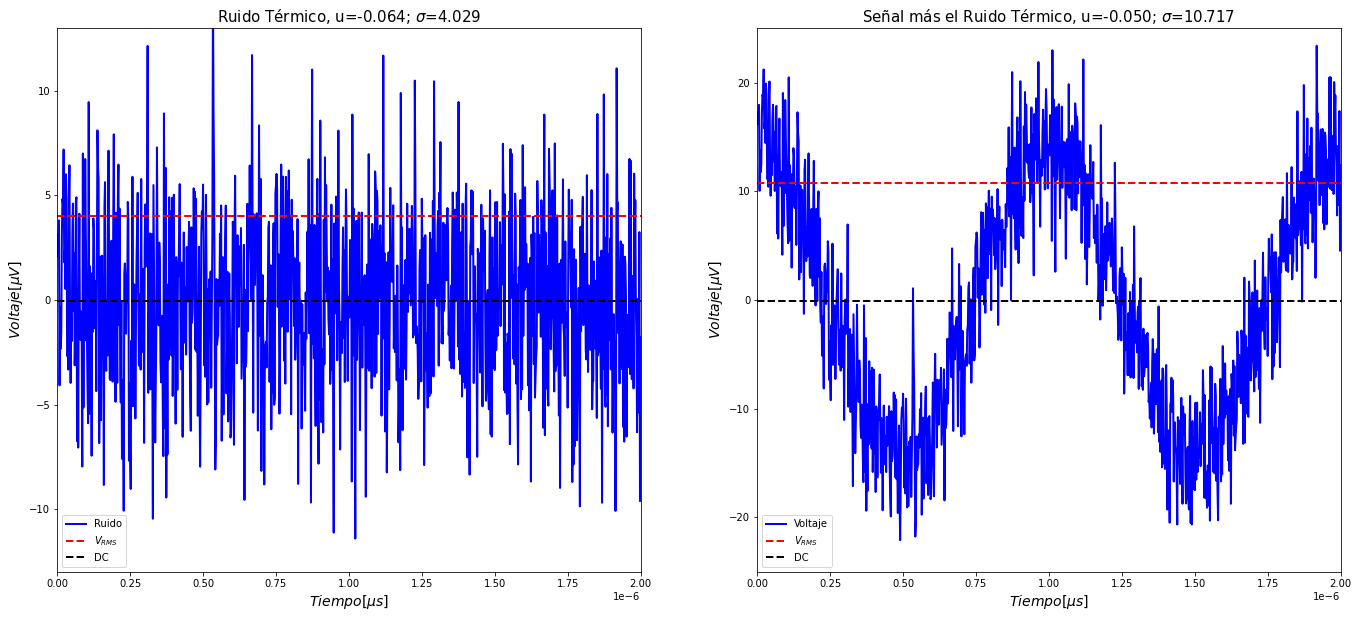

In [182]:
Voltaje_señal_en_uV = 10 #@param {type: "slider", min: 1, max: 10}
Ancho_de_Banda_Ruido_en_MHz = 1000  #@param {type: "slider", min: 1, max: 1000}
ruido_termico(Ancho_de_Banda_Ruido_en_MHz,Voltaje_señal_en_uV)